# CNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly as plty
import sklearn as skl

import matplotlib.mlab as mlabQ
import seaborn as sns

from copy import copy as copy
from pprint import pprint

import sys
import os


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [2]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [20]:
ds_path = os.path.abspath("./") + "/cifar-10-batches-py/"

batch_container = [ None for _ in range(5)]

for ii in os.listdir(ds_path):
    if "data" in ii:
        current_id = int(ii[-1]) - 1
        batch_container[current_id] = unpickle(ds_path + ii)
        
        dummy = batch_container[current_id]
        kkeys = list(dummy.keys())

        for kk in kkeys:
            dummy[repr(kk)[2:-1]] = dummy.pop(kk)      

In [21]:
keys_ids = ['batch_label', 'labels', 'data', 'filenames']

In [22]:
for ii in range(5):
    print(ii + 1)
    print(repr(batch_container[ii][keys_ids[0]])[2:-1])
    for keys_ in keys_ids[1:]:
        print(len(batch_container[ii][keys_]))

1
training batch 1 of 5
10000
10000
10000
2
training batch 2 of 5
10000
10000
10000
3
training batch 3 of 5
10000
10000
10000
4
training batch 4 of 5
10000
10000
10000
5
training batch 5 of 5
10000
10000
10000


In [23]:
x_data = [ batch_container[ii]["data"] for ii in range(5)]
y_data = [ batch_container[ii]["labels"] for ii in range(5)]

2

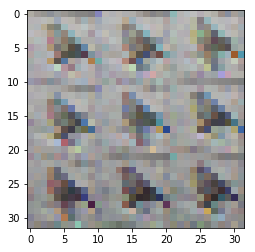

In [24]:
imgplot = plt.imshow(batch_container[0]["data"][120].reshape((32,32,3)),shape=(32,32,3))
batch_container[0]["labels"][120]

In [25]:
from keras.datasets import cifar10

### Paramethers

num_classes = 10

####

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


(32, 32, 3) [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


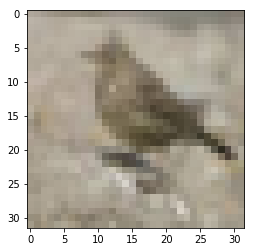

In [26]:
imgplot = plt.imshow(x_train[120],shape=(32,32,3))

print(
x_train[120].shape,
y_train[120],)

**Both image above are the same, but the first has being load from Disk and the other dowload directly from the Keras Repo. Dataset.**

> we are gonna work using the second loaded dataset

In [27]:
#Architecture
def createModel(input_shape, nClasses):
    model = Sequential()
    
    model.add(Conv2D(36, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(36, (2, 2), activation='selu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
 
    model.add(Conv2D(48, (2, 2), padding='same', activation='selu'))
    model.add(Conv2D(48, (4, 4), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='selu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
 
    model.add(Flatten())
    model.add(Dense(500, activation='selu'))
    model.add(Dropout(0.8))
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [28]:
epochs = 150
batch_size = 1000

model1 = createModel(x_train.shape[1:], num_classes)

model1.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 36)        1008      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 31, 31, 36)        5220      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 36)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 15, 15, 36)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 48)        6960      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 48)        36912     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 48)          0         
__________

In [30]:
history = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(x_test, y_test))

model1.evaluate(x_test, y_test)

Train on 50000 samples, validate on 10000 samples
Epoch 1/150
50000/50000 [==============================] - 26s 517us/step - loss: 4.1048 - acc: 0.1031 - val_loss: 2.3025 - val_acc: 0.1021
Epoch 2/150
50000/50000 [==============================] - 23s 453us/step - loss: 2.3094 - acc: 0.1177 - val_loss: 2.3050 - val_acc: 0.1039
Epoch 3/150
50000/50000 [==============================] - 23s 454us/step - loss: 2.2726 - acc: 0.1383 - val_loss: 2.2852 - val_acc: 0.1347
Epoch 4/150
50000/50000 [==============================] - 23s 456us/step - loss: 2.1998 - acc: 0.1792 - val_loss: 2.3063 - val_acc: 0.1337
Epoch 5/150
50000/50000 [==============================] - 23s 458us/step - loss: 2.0841 - acc: 0.2122 - val_loss: 2.0400 - val_acc: 0.2514
Epoch 6/150
50000/50000 [==============================] - 23s 457us/step - loss: 2.0459 - acc: 0.2379 - val_loss: 2.1421 - val_acc: 0.2196
Epoch 7/150
50000/50000 [==============================] - 23s 460us/step - loss: 1.8977 - acc: 0.2861 - val_l

Epoch 59/150
50000/50000 [==============================] - 25s 501us/step - loss: 0.7704 - acc: 0.7389 - val_loss: 0.8262 - val_acc: 0.7240
Epoch 60/150
50000/50000 [==============================] - 25s 498us/step - loss: 0.7827 - acc: 0.7325 - val_loss: 0.6611 - val_acc: 0.7705
Epoch 61/150
50000/50000 [==============================] - 26s 524us/step - loss: 0.7606 - acc: 0.7404 - val_loss: 0.7281 - val_acc: 0.7504
Epoch 62/150
50000/50000 [==============================] - 24s 489us/step - loss: 0.7500 - acc: 0.7446 - val_loss: 0.7142 - val_acc: 0.7536
Epoch 63/150
50000/50000 [==============================] - 24s 489us/step - loss: 0.7414 - acc: 0.7480 - val_loss: 0.6791 - val_acc: 0.7645
Epoch 64/150
50000/50000 [==============================] - 24s 488us/step - loss: 0.7389 - acc: 0.7479 - val_loss: 0.7054 - val_acc: 0.7581
Epoch 65/150
50000/50000 [==============================] - 25s 492us/step - loss: 0.7355 - acc: 0.7495 - val_loss: 0.6669 - val_acc: 0.7731
Epoch 66/150


Epoch 117/150
50000/50000 [==============================] - 25s 502us/step - loss: 0.5789 - acc: 0.8053 - val_loss: 0.6073 - val_acc: 0.7962
Epoch 118/150
50000/50000 [==============================] - 25s 498us/step - loss: 0.5543 - acc: 0.8142 - val_loss: 0.6192 - val_acc: 0.7934
Epoch 119/150
50000/50000 [==============================] - 26s 527us/step - loss: 0.5372 - acc: 0.8182 - val_loss: 0.6188 - val_acc: 0.7956
Epoch 120/150
50000/50000 [==============================] - 25s 499us/step - loss: 0.5633 - acc: 0.8119 - val_loss: 0.6435 - val_acc: 0.7898
Epoch 121/150
50000/50000 [==============================] - 25s 500us/step - loss: 0.5357 - acc: 0.8183 - val_loss: 0.6266 - val_acc: 0.7883
Epoch 122/150
50000/50000 [==============================] - 25s 495us/step - loss: 0.5549 - acc: 0.8120 - val_loss: 0.6286 - val_acc: 0.7918
Epoch 123/150
50000/50000 [==============================] - 25s 497us/step - loss: 0.5364 - acc: 0.8182 - val_loss: 0.6298 - val_acc: 0.7918
Epoch 

[0.6068103039741516, 0.7977]

Text(0.5,1,'Accuracy Curves')

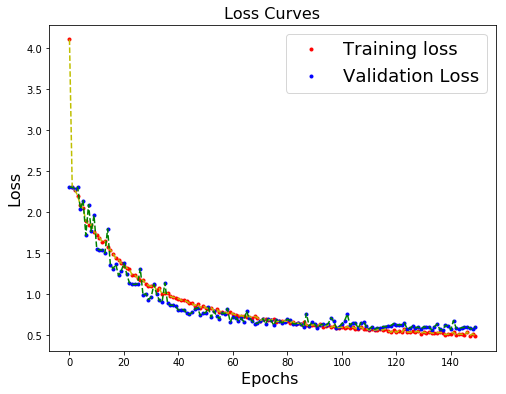

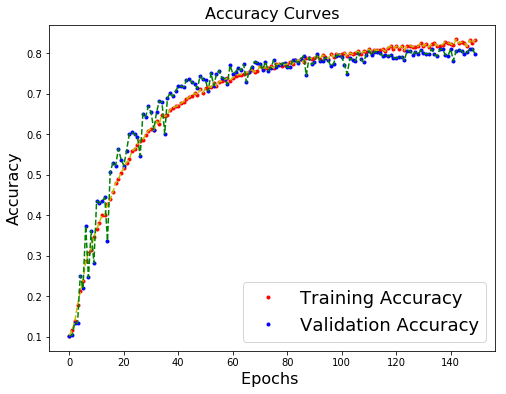

In [31]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'.r')
plt.plot(history.history['val_loss'],'.b')
plt.plot(history.history['loss'],'--y')
plt.plot(history.history['val_loss'],'--g')
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'.r')
plt.plot(history.history['val_acc'],'.b')
plt.plot(history.history['acc'],'--y')
plt.plot(history.history['val_acc'],'--g')
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [32]:
model1.save(filepath="./ann_model", include_optimizer=1)

### Continuing Training (Testing)

In [59]:
model2 = copy(model1)

In [61]:
batch_size = 5000
epochs = 5

history = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(x_test, y_test))
model2.evaluate(x_test, y_test)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 23s 463us/step - loss: 0.4180 - acc: 0.8577 - val_loss: 0.5365 - val_acc: 0.8286
Epoch 2/5
50000/50000 [==============================] - 21s 429us/step - loss: 0.4086 - acc: 0.8616 - val_loss: 0.5972 - val_acc: 0.8108
Epoch 3/5
50000/50000 [==============================] - 22s 433us/step - loss: 0.4158 - acc: 0.8586 - val_loss: 0.5444 - val_acc: 0.8257
Epoch 4/5
50000/50000 [==============================] - 21s 428us/step - loss: 0.3893 - acc: 0.8686 - val_loss: 0.5552 - val_acc: 0.8224
Epoch 5/5
10000/10000 [==============================] - 4s 365us/step


[0.5577428447961807, 0.8212]

Text(0.5,1,'Accuracy Curves')

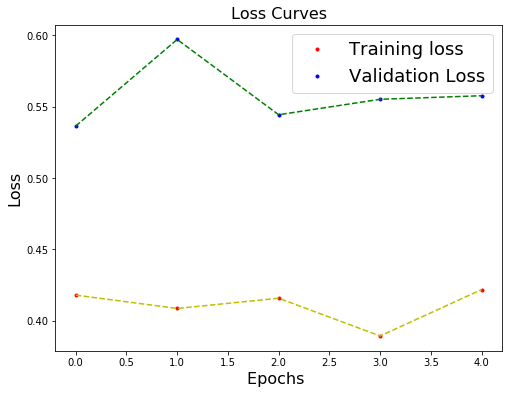

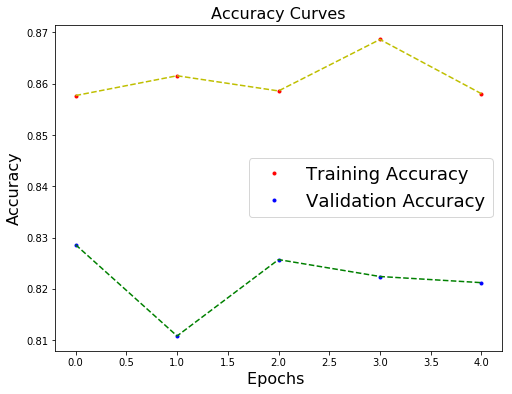

In [62]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'.r')
plt.plot(history.history['val_loss'],'.b')
plt.plot(history.history['loss'],'--y')
plt.plot(history.history['val_loss'],'--g')
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'.r')
plt.plot(history.history['val_acc'],'.b')
plt.plot(history.history['acc'],'--y')
plt.plot(history.history['val_acc'],'--g')
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [63]:
model3 = copy(model2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 22s 446us/step - loss: 0.4544 - acc: 0.8466 - val_loss: 0.5417 - val_acc: 0.8257
Epoch 2/50
50000/50000 [==============================] - 23s 460us/step - loss: 0.4531 - acc: 0.8470 - val_loss: 0.5561 - val_acc: 0.8225
Epoch 3/50
50000/50000 [==============================] - 22s 442us/step - loss: 0.4215 - acc: 0.8610 - val_loss: 0.5556 - val_acc: 0.8255
Epoch 4/50
50000/50000 [==============================] - 22s 446us/step - loss: 0.4793 - acc: 0.8411 - val_loss: 0.5897 - val_acc: 0.8067
Epoch 5/50
50000/50000 [==============================] - 22s 446us/step - loss: 0.4294 - acc: 0.8562 - val_loss: 0.5763 - val_acc: 0.8155
Epoch 6/50
50000/50000 [==============================] - 22s 442us/step - loss: 0.4483 - acc: 0.8495 - val_loss: 0.5465 - val_acc: 0.8280
Epoch 7/50
50000/50000 [==============================] - 22s 446us/step - loss: 0.4327 - acc: 0.8537 - val_loss: 0.

Text(0.5,1,'Accuracy Curves')

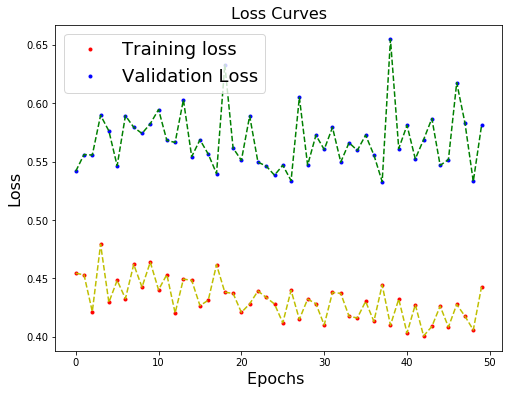

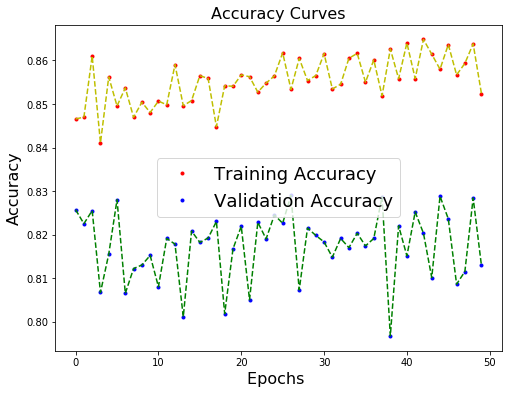

In [70]:
batch_size = 2000
epochs = 50



history = model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(x_test, y_test))
model3.evaluate(x_test, y_test)

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'.r')
plt.plot(history.history['val_loss'],'.b')
plt.plot(history.history['loss'],'--y')
plt.plot(history.history['val_loss'],'--g')
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'.r')
plt.plot(history.history['val_acc'],'.b')
plt.plot(history.history['acc'],'--y')
plt.plot(history.history['val_acc'],'--g')
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Text(0.5,1,'Acc (Train - Valid) Curves')

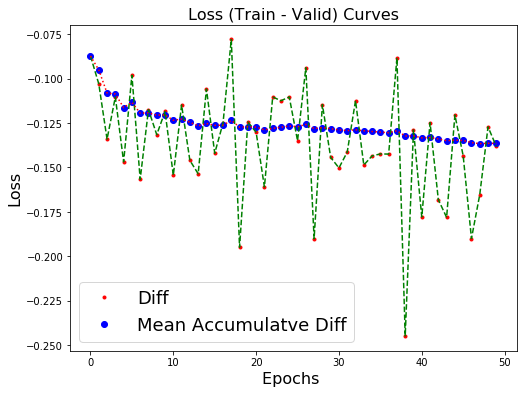

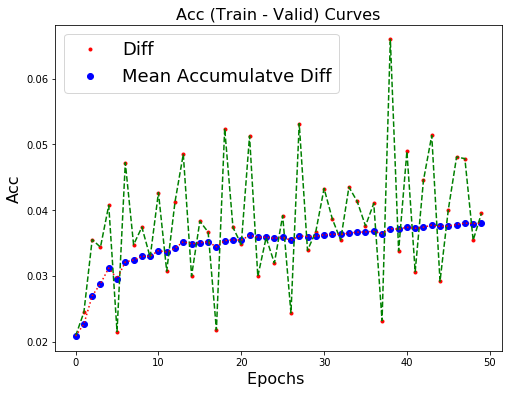

In [92]:
# Loss Curves
plt.figure(figsize=[8,6])

diff_loss = list(map(lambda x,y: (x-y), history.history['loss'] , history.history['val_loss']))
diff_loss_cum = np.cumsum(np.array(diff_loss)) / np.arange(1,51,1)

plt.plot(diff_loss,'.r')
plt.plot(diff_loss_cum, 'ob')

plt.plot(diff_loss,'--g')
plt.plot(diff_loss_cum, ':r')

plt.legend(['Diff', 'Mean Accumulatve Diff'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss (Train - Valid) Curves',fontsize=16)

# Acc Curves
plt.figure(figsize=[8,6])

diff_acc = list(map(lambda x,y: (x-y), history.history['acc'] , history.history['val_acc']))
diff_acc_cum = np.cumsum(np.array(diff_acc)) / np.arange(1,51,1)

plt.plot(diff_acc,'.r')
plt.plot(diff_acc_cum, 'ob')

plt.plot(diff_acc,'--g')
plt.plot(diff_acc_cum, ':r')

plt.legend(['Diff', 'Mean Accumulatve Diff'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Acc',fontsize=16)
plt.title('Acc (Train - Valid) Curves',fontsize=16)